In [1]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [2]:
df = pd.read_csv('../data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [3]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [4]:
year_means = df.groupby(df['Day'].dt.year).mean()

print(f"the warmest year {year_means.idxmax()['t']} with mean temp {year_means.max()['t']}")
print(f"the coldest year {year_means.idxmin()['t']} with mean temp {year_means.min()['t']}")

the warmest year 2015 with mean temp 9.07945205479452
the coldest year 2012 with mean temp 6.980821917808219


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [5]:
filter_month_above_zero = (df['Day'].dt.month == 1) & (df.t >= 0)
filtered_df = df[filter_month_above_zero].groupby(df['Day'].dt.year).count()

print(f"ans: {filtered_df.idxmax()['t']} with pos temp day amount: {filtered_df.max()['t']}")

ans: 2008 with pos temp day amount: 19


**3.** В каком году было самое холодное лето (по средней температуре)

In [6]:
filter_summer = (df['Day'].dt.month >= 6) & (df['Day'].dt.month <= 8)
filtered_df = df[filter_summer].groupby(df['Day'].dt.year).mean()

print(f"the coldest summer year: {filtered_df.idxmin()['t']} with summer mean temp: {filtered_df.min()['t']}")

the coldest summer year: 2008 with summer mean temp: 18.119565217391305


**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [10]:
diff_df = df['t'].diff().abs()

print(f"max diff day: {df.iloc[diff_df.idxmax()].Day} with diff {diff_df.max()} ")

max diff day: 2014-05-27 00:00:00 with diff 15.0 


**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

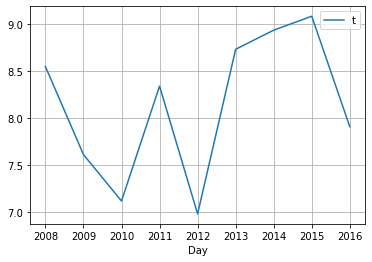

In [12]:
df.groupby(df['Day'].dt.year).mean().plot()
plt.grid()